In [1]:
import pandas as pd
# Load data from the Excel sheet
file_path = "/Users/elchulito/Library/CloudStorage/OneDrive-polymtl/PlasticFADE.xlsx"  # CHECK: confirm file path
sheet_name = "Rate constants"

# Read and display the data
data_F = pd.read_excel(file_path, sheet_name=sheet_name, usecols='A:E', skiprows=2)
pd.set_option('display.float_format', '{:.2e}'.format)
data_F = data_F.iloc[0:21, :]

print(data_F)

   Polymer Compartment  kfrag [d-1]  kfrag_LL [d-1]  kfrag_UL [d-1]
0       PP         Air     2.48e-05        1.13e-08        3.09e+00
1       PP        TopS     7.08e-06        7.51e-09        1.04e+00
2       PP        SubS     0.00e+00        0.00e+00        0.00e+00
3       PP       Beach     3.17e-04        5.75e-08        1.55e+01
4       PP        WSur     1.94e-05        9.59e-09        2.70e+00
5       PP        WCol     2.98e-10        7.34e-20        3.35e-03
6       PP        Sedm     0.00e+00        0.00e+00        0.00e+00
7       PS         Air     2.57e-06        2.50e-06        2.64e-06
8       PS        TopS     1.91e-07        1.86e-07        1.97e-07
9       PS        SubS     0.00e+00        0.00e+00        0.00e+00
10      PS       Beach     1.79e-03        1.73e-03        1.84e-03
11      PS        WSur     2.46e-06        2.40e-06        2.53e-06
12      PS        WCol     3.22e-24        3.01e-24        3.44e-24
13      PS        Sedm     0.00e+00        0.00e

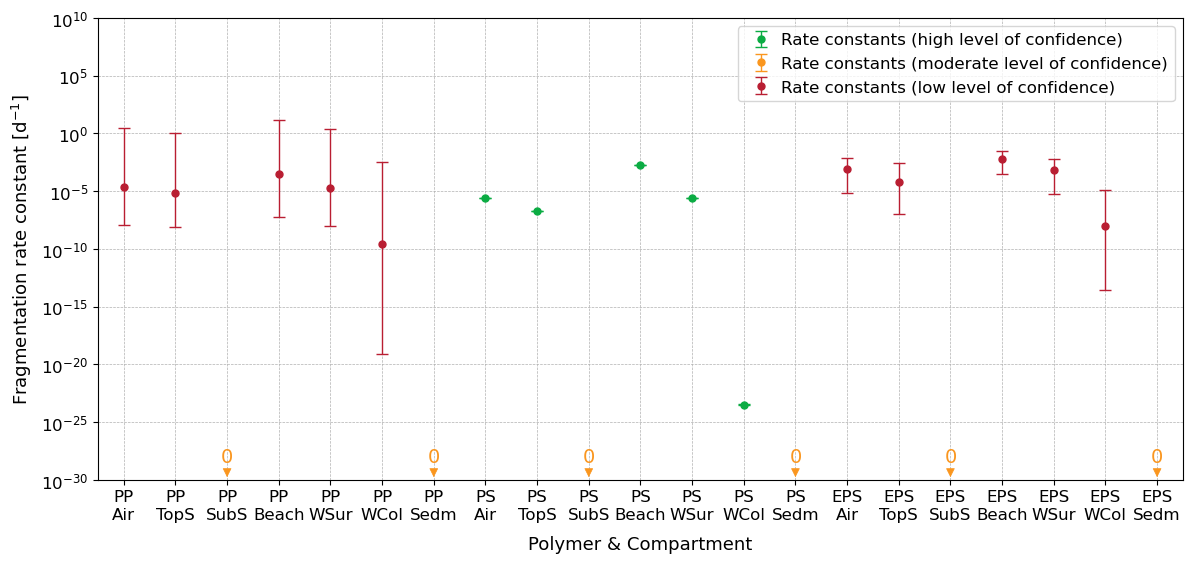

In [7]:
# Color coding integrated
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import numpy as np

# Set up the figure and axis
plt.figure(figsize=(14, 6))

x = range(len(data_F))
data_F['x_labels'] = data_F['Polymer'] + '\n' + data_F['Compartment']

y = data_F['kfrag [d-1]']
yerr_lower = y - data_F['kfrag_LL [d-1]']
yerr_upper = data_F['kfrag_UL [d-1]'] - y
yerr = [yerr_lower, yerr_upper]  # Asymmetric error bars

# Specify indices for each color-coding category (0-based)
idx_high = list(range(7,14))
idx_moderate = [2, 6, 16, 20]
idx_low = [i for i in range(len(data_F)) if i not in idx_high + idx_moderate]

# Plot main results with asymmetric error bars
def plot_points(indices, color, label):
    first = True
    for i in indices:
        yi  = y.iloc[i]
        yerr_i = [[yerr_lower.iloc[i]], [yerr_upper.iloc[i]]]
        plt.errorbar(
            [i], [yi], yerr=yerr_i,
            fmt='o',
            color=color,  # marker color
            ecolor=color,  # error bar color (use 'black' here if you prefer black whiskers)
            markersize=5,
            elinewidth=1,
            capsize=4,
            label=label if first else None
        )
        first = False

plot_points(idx_high, '#0BAC43', 'Rate constants (high level of confidence)')
plot_points(idx_moderate, '#FA961E', 'Rate constants (moderate level of confidence)')
plot_points(idx_low, '#B91E32', 'Rate constants (low level of confidence)')

# Show the outliers (in case some modeled rate constants lie outside the plot boundary)
y_max = 1e+10
label_y = y_max * 10**1.0  # X% above the plot top
min_display_y = 1e-30

for i in range(len(data_F)):
    upper = data_F['kfrag_UL [d-1]'].iloc[i]
    y_val = y.iloc[i]
    if upper > y_max:
        label = f"{upper:.1e}"

        plt.plot(
            [i, i],              # x-coordinates
            [y_max, label_y],    # from plot top to label
            color='grey',
            linewidth=1,
            linestyle=':',
            clip_on=False  
        )       

    # Draw text label
        plt.text(
            i, label_y,
            label,
            ha='center',
            va='bottom',
            # fontsize=9,
            color='grey'
        )

    # "Zero" values: mark on the x-axis
    if y_val < min_display_y:
        y_zero_marker = min_display_y * 1  # Position arrow slightly above the bottom limit
        y_zero_label = y_zero_marker * 15  # Adjust the margin between text and arrow
        plt.annotate(
            '0', 
            xy=(i, y_zero_marker),       # Position the arrow tip
            xytext=(i, y_zero_label),  # Position the text above the arrow
            textcoords='data',
            ha='center',
            va='bottom',
            fontsize=14,
            color='#FA961E',
            arrowprops=dict(arrowstyle='-|>', color='#FA961E', lw=0.5),
            clip_on=False
        )

# Configure x-axis
plt.xticks(x, data_F['x_labels'])
plt.yscale('log')
plt.xlabel('Polymer & Compartment', labelpad=10, fontsize=13)
plt.ylabel('Fragmentation rate constant [d$^{-1}$]', labelpad=5, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', handletextpad=0.2, fontsize=12)
plt.xlim(-0.5, len(data_F) - 0.5)  # Pull the first and last data points closer to the edge of the plot
plt.ylim(1e-30, 1e+10)  # Set the y-axis range (change manually)
plt.gca().yaxis.set_major_locator(FixedLocator([10**exp for exp in range(-30, 11, 5)]))  # Manually set the tick positions at every 1e5
plt.grid(True, which="major", ls="--", lw=0.5)

plt.savefig("/Users/elchulito/FRAG.png", dpi=600, bbox_inches='tight')  # CHECK: confirm name and desired place for the plot
plt.show()